# Intro to Data Manipulation and Visualization in Julia
In this section, we will learn how to read in data and conduct data manipulation and visualization in Julia. This is an important step in solving a real-world optimization problem, as real-world data can be messy and difficult to work with.

## DataFrames
Like data frames in `R`, `Julia` also has a similar structure for datasets. You will need to load the packages `DataFrames` and `CSV` first:

In [1]:
using DataFrames, CSV

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1242
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1242


Now let's read in a csv file for the dataset _iris_ using the `CSV.read` function. The csv file should sit in the same directory as this script. Otherwise, you will need to change the path to the file for the first argument to the `CSV.read` function.

In [2]:
iris = CSV.read("iris.csv");

In [ ]:
### If you are unable to read the data, you can uncomment the following code and run it:
# using RDatasets
# iris = dataset("datasets", "iris")

To view the first few rows of the data, you can use `first()`, or index the dataframe similar to what you did you in `R`:

To subset rows, pass in the indices in the first dimension. If you are not subsetting to particular columns, just pass in ``:`` in the second dimension (as opposed to leaving it blank in `R`).

In [4]:
iris[1:5,:]
first(iris,5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


To index a column using column name, simply put a `:` in front of the name to make it into a Julia symbol. 
We could also write the column name like this: `symbol("SepalLength")`.


To select all rows, you can either type `[:,:columnName]` or `[!,:columnName]`.

In [5]:
iris[!,:SepalLength]

150-element CSV.Column{Float64,Float64}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮  
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

We often times need to join/merge datasets. Let's look at an example first: suppose we have a dataframe that gives the species and the respective price at a flower shop:

In [6]:
species_price = DataFrame(Species = ["setosa", "versicolor", "virginica"],
                        Price = [2.5, 3.1, 3.2])

,Species,Price
,String,Float64
1,setosa,2.5
2,versicolor,3.1
3,virginica,3.2


 To join, simply pass in:
 * the two data frames,
 * the shared variable name, and
 * the option for the kind of join you wanted: 
 
 `:left`, `:right`, `:inner`, `:outer`, etc.

In [7]:
join(iris, species_price, on = :Species, kind = :left)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Price
,Float64,Float64,Float64,Float64,String,Float64⍰
1,5.1,3.5,1.4,0.2,setosa,2.5
2,4.9,3.0,1.4,0.2,setosa,2.5
3,4.7,3.2,1.3,0.2,setosa,2.5
4,4.6,3.1,1.5,0.2,setosa,2.5
5,5.0,3.6,1.4,0.2,setosa,2.5
6,5.4,3.9,1.7,0.4,setosa,2.5
7,4.6,3.4,1.4,0.3,setosa,2.5
8,5.0,3.4,1.5,0.2,setosa,2.5
9,4.4,2.9,1.4,0.2,setosa,2.5



## Plotting in Julia

Julia also has extensive support for plotting. 

* `Plots.jl` is a powerful and concise tool for plotting. It provides the interface to many other plotting packages with simple and consistent syntax.
* `StatPlots.jl` offers the DataFrames integration for `Plots`. You can pass in a data frame, and map aesthetics to the column names directly. 

Using these would be somewhat similar to working with `ggplot2` in `R`. 

Here is an example of a scatter plot based on the `iris` data, where the x axis is the `SepalLength`, y axis is `SepalWidth`, and the grouping (therefore the colors) are based on the `Species`.

In [8]:
using Plots
using StatsPlots
pyplot()
scatter(iris[!,:SepalLength],iris[!,:SepalWidth],group=iris[!,:Species])

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1242
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1242


InitError: InitError: PyError (PyImport_ImportModule

The Python package matplotlib could not be found by pyimport. Usually this means
that you did not install matplotlib in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/Users/EZ/Documents/Projects/RAship/venv/bin/python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the matplotlib module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the matplotlib module, you can use `pyimport_conda("matplotlib", PKG)`,
where PKG is the Anaconda package the contains the module matplotlib,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'matplotlib'",)

during initialization of module PyPlot

We can make the plot more interesting by adding a few custom settings. For example:
* Give it a title
* Provide xlabel and ylabel
* Change the transparency, shape, and size of the dots
* change background color to dark grey

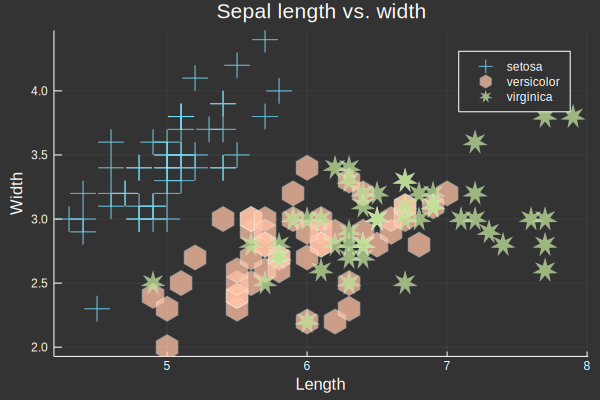

In [9]:
scatter(iris[!,:SepalLength],iris[!,:SepalWidth],group=iris[!,:Species],
        title = "Sepal length vs. width",
        xlabel = "Length", ylabel = "Width",
        m=(0.5, [:cross :hex :star7], 12),
        bg=RGB(.2,.2,.2))

You can also do a box plot (with the violin plot in the background) grouped by the species. Note the `!` in `boxplot!` adds the current plot to the existing one. 

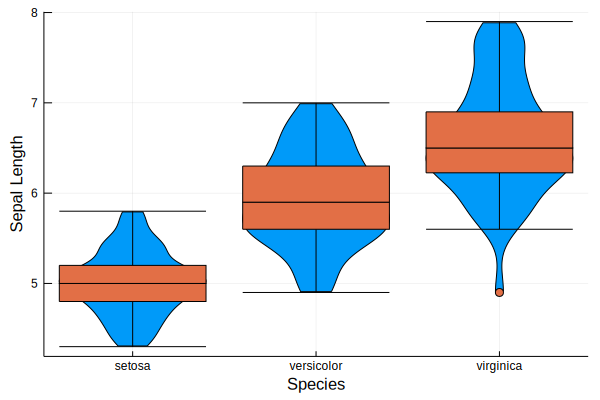

In [10]:
violin(iris[!,:Species],iris[!,:SepalLength])
boxplot!(iris[!,:Species],iris[!,:SepalLength], leg=false,
    xlabel = "Species", ylabel = "Sepal Length")

There are many other types of plots and custom options. You can explore more from [the tutorial](https://juliaplots.github.io/tutorial/).

## Exercise: Plotting Icecream data

This time, we are going to read in a dataset directly from the package `RDatasets`. Use the following syntax 
```dataset("Ecdat", "Icecream")```

and save it as a dataframe called `icecream`. 

The dataset is on the ice cream consumption. The columns are:
* `Cons`: consumption level of ice cream
* `Income`: income level
* `Price`: price of ice cream
* `Temperature`: outside temperature at time of measurement

Inspect the first few rows of the data.

In [11]:
using RDatasets
icecream = dataset("Ecdat", "Icecream")
first(icecream,5)

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1242


,Cons,Income,Price,Temp
,Float64,Int64,Float64,Int64
1,0.386,78,0.27,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.28,68
5,0.406,76,0.272,69


### Task 1:
How is income related to Consumption?

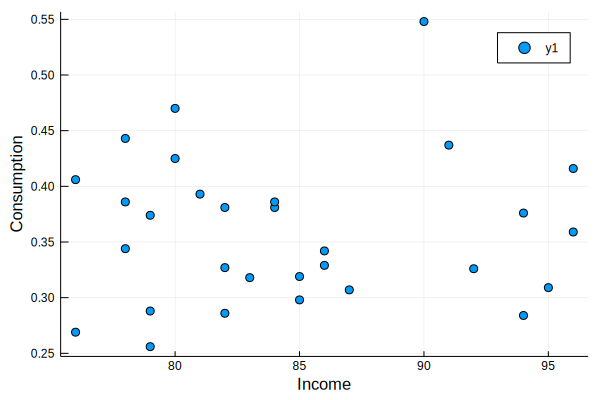

In [12]:
scatter(icecream[!,:Income], icecream[!,:Cons],
    xlabel = "Income", ylabel = "Consumption")

### Task 2:
Create the `Revenue` variable as the product between `Price` and `Cons`. 

Do you see a positive relationship between the temperature and revenue?

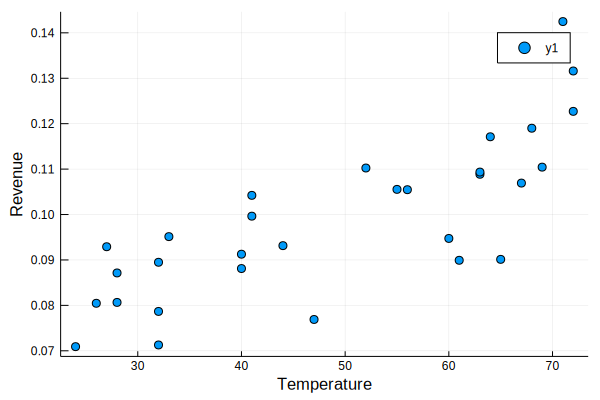

In [14]:
icecream[!,:Revenue] = icecream[!,:Price] .* icecream[!,:Cons]
scatter(icecream[!,:Temp], icecream[!,:Revenue],
xlabel = "Temperature", ylabel = "Revenue")

### Task 3:
Create a new variable `IncomeGroup` that assigns label to each row based on how much income was recorded (e.g. you could have 'low', 'medium' and 'high' groups).

Plot the distribution of the consumption over the different groups. What do you find?

In [ ]:
function get_income_group(x)
    if (x < 80) 
        gr = "low"
    elseif (x < 85)
        gr = "medium"
    else 
        gr = "high"
    end
end

icecream[!,:IncomeGroup] = map(get_income_group,icecream[!,:Income])

In [ ]:
boxplot(icecream[!,:IncomeGroup], icecream[!,:Cons], leg=false,
xlabel = "Income group", ylabel = "Consumption")